In [60]:
import xgboost as xgb
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [61]:
raw = pd.read_csv("data.csv")
raw.head()

,순번,H,S,V,R,G,B,l,a,b,계절,봄,여름,가을,겨울,CW
0,1,7,11,84,215,194,191,80,7,4,1,1,0,0,0,1
1,2,354,50,85,218,108,119,59,45,15,1,1,0,0,0,1
2,3,11,65,85,218,103,76,58,45,38,1,1,0,0,0,1
3,4,1,65,82,210,76,73,52,54,32,1,1,0,0,0,1
4,5,36,79,83,211,143,44,65,21,60,1,1,0,0,0,1


In [62]:
X = raw[['H','S', 'V','R', 'G', 'B', 'l', 'a', 'b']]
y = raw[['CW']]

In [64]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [103]:
"""
model = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=100)
"""

model = xgb.XGBClassifier(silent=False, 
                          booster='gbtree',
                          scale_pos_weight=1,
                          learning_rate=0.01,  
                          colsample_bytree = 0.4,
                          subsample = 0.8,
                          objective='binary:logistic', 
                          n_estimators=2000, 
                          max_depth=15, 
                          gamma=10, 
                          seed=777)

In [104]:
model.fit(X_train, y_train)

[17:58:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=777, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=777, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

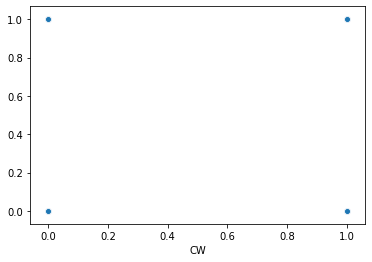

In [105]:
sns.scatterplot(raw['CW'], model.predict(X))

In [106]:
Y_predict = model.predict(X_test)
print(Y_predict)

[0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0]


In [107]:
model_matrix = metrics.confusion_matrix(y_test, Y_predict)
print(model_matrix)

model_report = metrics.classification_report(y_test, Y_predict)
print(model_report)

[[70 17]
 [18 75]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.82      0.81      0.81        93

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

